In [0]:
def count_words(text):

  """" Counts and returns the dictionary of unique words in the text with its word counts"""
  
  text = text.lower()
  skips = [".", ",", ";", ":", "'", '"']
  for ch in skips:
    text= text.replace(ch, "")
  word_counts={}
  for word in text.split(" "):
    if (word in word_counts):
      word_counts[word] += 1
    else:
      word_counts[word] = 1
  return word_counts   

In [0]:
 from collections import Counter

 def count_words_fast(text):

   """" Counts and returns the dictionary of unique words in the text with its word counts using Counter. """

  text = text.lower()
  skips = [".", ",", ";", ":", "'", '"']
  for ch in skips:
    text= text.replace(ch, "")
  word_counts = Counter(text.split(" "))
  return word_counts

In [0]:
text = "This is my test text. We're keeping this text short to keep things manageable."

In [37]:
count_words_fast(text)

Counter({'is': 1,
         'keep': 1,
         'keeping': 1,
         'manageable': 1,
         'my': 1,
         'short': 1,
         'test': 1,
         'text': 2,
         'things': 1,
         'this': 2,
         'to': 1,
         'were': 1})

In [38]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [0]:
def read_book(title):
  """ Reads a book and return it as a string. """ 
  with open(title, "r", encoding= "utf8") as current_file:
    text = current_file.read()
    text.replace("\n", "").replace("\r", "")
  return text

In [0]:
def word_stats(word_counts):
  """ Returns number of  unique words and word frequencies."""
  num_unique = len(word_counts)
  counts = word_counts.values()
  return (num_unique, counts)

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
book_dir = 'drive/My Drive/Language Processing Case Study/Books'

In [45]:
os.listdir(book_dir)

['French', 'English', 'Portuguese', 'German']

In [46]:
print(type(os.listdir(book_dir)))

<class 'list'>


In [56]:
book_dir = 'drive/My Drive/Language Processing Case Study/Books'

import pandas as pd
stats = pd.DataFrame(columns = ('Language', 'Author', 'Title', 'Length', 'Unique' ))
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + '/' + author):
            inputfile = book_dir + '/' + language + '/' + author + '/' + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            #Capitalize Author
            #remove txt from title
            stats.loc[title_num] = language, author.capitalize(), title.replace('.txt', ''), sum(counts), num_unique
            title_num += 1

drive/My Drive/Language Processing Case Study/Books/French/diderot/Entretien d'un pa╠êre avec ses enfants.txt
drive/My Drive/Language Processing Case Study/Books/French/diderot/Regrets sur ma vieille robe de chambre.txt
drive/My Drive/Language Processing Case Study/Books/French/diderot/L'oiseau blanc.txt
drive/My Drive/Language Processing Case Study/Books/French/diderot/Les deux amis de Bourbonne.txt
drive/My Drive/Language Processing Case Study/Books/French/diderot/Ceci n'est pas un conte.txt
drive/My Drive/Language Processing Case Study/Books/French/sand/Jacques le fataliste et son maa╠ètre.txt
drive/My Drive/Language Processing Case Study/Books/French/sand/La Coupe; Lupo Liverani; Le Toast; Garnier; Le Contrebandier; La Ra╠Çverie O╠ê Paris.txt
drive/My Drive/Language Processing Case Study/Books/French/sand/cora.txt
drive/My Drive/Language Processing Case Study/Books/French/sand/L' Orco.txt
drive/My Drive/Language Processing Case Study/Books/French/sand/Metella.txt
drive/My Drive

In [57]:
stats

,Language,Author,Title,Length,Unique
1,French,Diderot,Entretien d'un pa╠êre avec ses enfants,11125,3748
2,French,Diderot,Regrets sur ma vieille robe de chambre,4980,1895
3,French,Diderot,L'oiseau blanc,21973,6371
4,French,Diderot,Les deux amis de Bourbonne,8510,2977
5,French,Diderot,Ceci n'est pas un conte,10938,3741
...,...,...,...,...,...
98,German,Shakespeare,Romeo und Julia,20311,7564
99,German,Shakespeare,Hamlet,31635,9717
100,German,Shakespeare,Macbeth,19311,6782
101,German,Shakespeare,Der Kaufmann von Venedig,20600,7152


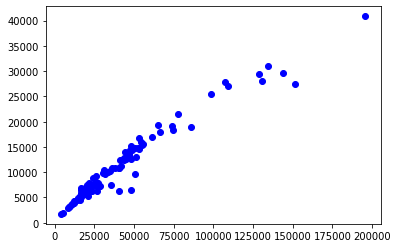

In [59]:
plt.plot(stats.Length, stats.Unique, 'bo')
plt.show()

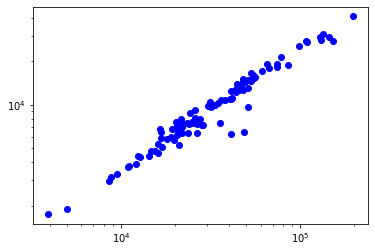

In [60]:
plt.loglog(stats.Length, stats.Unique, 'bo')
plt.show()

In [61]:
stats[stats.Language == 'English']

,Language,Author,Title,Length,Unique
33,English,Shakespeare,The Merchant of Venice,20949,5292
34,English,Shakespeare,Romeo and Juliet,40776,6251
35,English,Shakespeare,A Midsummer Night's Dream,16103,4602
36,English,Shakespeare,Richard III,48315,6508
37,English,Shakespeare,Hamlet,28551,7236
38,English,Shakespeare,Othello,26590,6350
39,English,Shakespeare,Macbeth,16874,5109


In [62]:
stats[stats.Language == 'French']

,Language,Author,Title,Length,Unique
1,French,Diderot,Entretien d'un pa╠êre avec ses enfants,11125,3748
2,French,Diderot,Regrets sur ma vieille robe de chambre,4980,1895
3,French,Diderot,L'oiseau blanc,21973,6371
4,French,Diderot,Les deux amis de Bourbonne,8510,2977
5,French,Diderot,Ceci n'est pas un conte,10938,3741
6,French,Sand,Jacques le fataliste et son maa╠ètre,85756,18879
7,French,Sand,La Coupe; Lupo Liverani; Le Toast; Garnier; Le...,47831,12590
8,French,Sand,cora,12370,4392
9,French,Sand,L' Orco,8748,3180
10,French,Sand,Metella,19600,5737


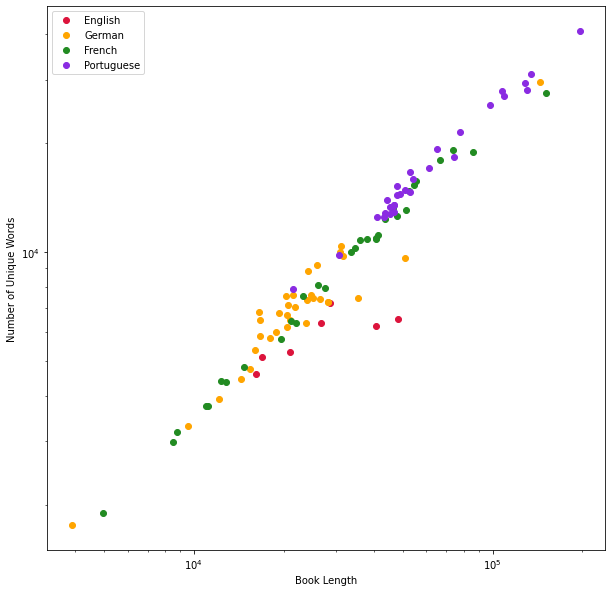

In [67]:
plt.figure(figsize = (10,10))
subset = stats[stats.Language == 'English']
plt.loglog(subset.Length, subset.Unique, 'o', label = 'English', color = 'crimson')
subset = stats[stats.Language == 'German']
plt.loglog(subset.Length, subset.Unique, 'o', label = 'German', color = 'orange')
subset = stats[stats.Language == 'French']
plt.loglog(subset.Length, subset.Unique, 'o', label = 'French', color = 'forestgreen')
subset = stats[stats.Language == 'Portuguese']
plt.loglog(subset.Length, subset.Unique, 'o', label = 'Portuguese', color = 'blueviolet')
plt.legend();
plt.xlabel('Book Length')
plt.ylabel('Number of Unique Words')
plt.savefig('drive/My Drive/Language Processing Case Study/lang_plot.pdf')
plt.show()